<img src="https://i.esdrop.com/d/7o0dj05m8rnz/JNGCMedl18.png" width="45%">

# Ensenble

---

In [1]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 1 Ensenble
- 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 수행
- Overfitting 방지

|구분 | 지도 학습 | 비고|
|:--- |:--- |:---|
|보팅(Voting) | 서로 다른 알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과를 보팅 (Hard Voting / Soft Voting) | 랜덤 포레스트|
|배깅(Bagging) | 단일 결정 트리로 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅 | 랜덤 포레스트|
|부스팅(Boosting) | 여러 개의 분류기가 순차적으로 학습하면서 앞에서 학습한 분류기가 틀린 데이터에 대해서는 가중치를 부여하면서 학습과 예측을 진행 | GBM, XGBoost|
|스태킹(Stacking) | 스태킹은 여러가지 다른 모델의 예측 결과값을 다시 학습데이터로 만들어 다른 모델로 재학습시켜 결과를 예측하는 방법 | -|

# 2 Random Forest

- 회귀 결과 예측 방법: 노드의 값들을 평균
- 분류 결과 예측 방법: 범주의 갯수 카운팅
  - Hard voting
  - Soft voting

### 2.1 Random Forest 모델 생성

In [2]:
# Visual Python: Machine Learning > Data Sets
from sklearn.datasets import load_breast_cancer

ldata = load_breast_cancer()
# Create DataFrame
df_ldata = pd.DataFrame(data=ldata.data, columns=ldata.feature_names)
df_ldata['target'] = ldata.target
df_ldata

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_ldata[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness',
                                                              'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 
                                                              'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 
                                                              'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 
                                                              'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 
                                                              'worst concave points', 'worst symmetry', 'worst fractal dimension']],
                                                              df_ldata['target'])

In [4]:
# Visual Python: Machine Learning > Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [5]:
# Visual Python: Machine Learning > Fit/Predict
model.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
# Visual Python: Machine Learning > Fit/Predict
pred = model.predict(X_test)
pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [7]:
# Visual Python: Machine Learning > Evaluation
from sklearn import metrics

In [8]:
# Visual Python: Machine Learning > Evaluation
# Confusion Matrix
pd.crosstab(y_test, pred, margins=True)

col_0,0,1,All
target,,,
0,41,3,44
1,3,96,99
All,44,99,143


In [9]:
# Visual Python: Machine Learning > Evaluation
# Classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        44
           1       0.97      0.97      0.97        99

    accuracy                           0.96       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [10]:
# Visual Python: Machine Learning > Evaluation
# Accuracy
metrics.accuracy_score(y_test, pred)

0.958041958041958

In [11]:
# Visual Python: Machine Learning > Evaluation
# Precision
metrics.precision_score(y_test, pred, average='weighted')

0.958041958041958

In [12]:
# Visual Python: Machine Learning > Evaluation
# Recall
metrics.recall_score(y_test, pred, average='weighted')

0.958041958041958

In [13]:
# Visual Python: Machine Learning > Evaluation
# F1-score
metrics.f1_score(y_test, pred, average='weighted')

0.958041958041958

In [14]:
# Visual Python: Machine Learning > Model Info
def vp_create_feature_importances(model, X_train=None, sort=False):
    if isinstance(X_train, pd.core.frame.DataFrame):
        feature_names = X_train.columns
    else:
        feature_names = [ 'X{}'.format(i) for i in range(len(model.feature_importances_)) ]
                        
    df_i = pd.DataFrame(model.feature_importances_, index=feature_names, columns=['Feature_importance'])
    df_i['Percentage'] = 100 * (df_i['Feature_importance'] / df_i['Feature_importance'].max())
    if sort: df_i.sort_values(by='Feature_importance', ascending=False, inplace=True)
    df_i = df_i.round(2)
                        
    return df_i
def vp_plot_feature_importances(model, X_train=None, sort=False, top_count=0):
    df_i = vp_create_feature_importances(model, X_train, sort)
                        
    if sort: 
        if top_count > 0:
            df_i['Percentage'].sort_values().tail(top_count).plot(kind='barh')
        else:
            df_i['Percentage'].sort_values().plot(kind='barh')
    else: 
        df_i['Percentage'].plot(kind='barh')
    plt.xlabel('Feature importance Percentage')
    plt.ylabel('Features')
                        
    plt.show()

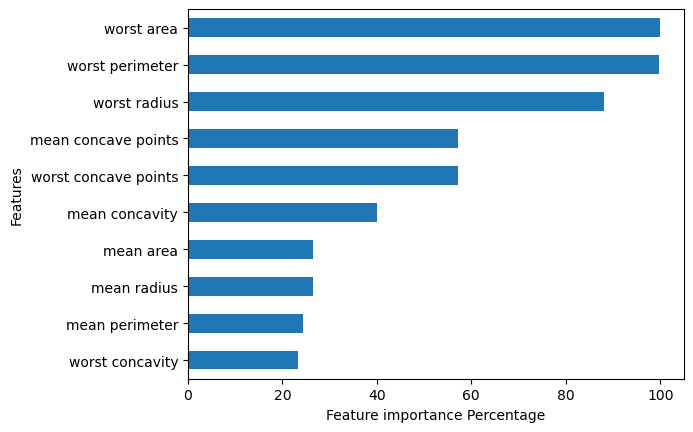

In [15]:
# Visual Python: Machine Learning > Model Info
vp_plot_feature_importances(model, X_train, sort=True, top_count=10)

# 3 GBM - Gradient Boosting Machine

- AdaBoost

- GBM
  - 회귀: 잔차를 예측
  - 분류: logloss 예측

#### GBM 적용

In [16]:
# Visual Python: Machine Learning > GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gs = GridSearchCV(GradientBoostingClassifier(), {'learning_rate': [0.01,0.02], 'max_depth': [1,3,5]})

In [17]:
# Visual Python: Machine Learning > Fit/Predict
gs.fit(X_train, y=y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.02], 'max_depth': [1, 3, 5]})

In [18]:
# Visual Python: Machine Learning > Fit/Predict
pred = gs.predict(X_test)
pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [19]:
# Visual Python: Machine Learning > Evaluation
from IPython.display import display, Markdown

In [20]:
# Visual Python: Machine Learning > Evaluation
# Confusion Matrix
display(Markdown('### Confusion Matrix'))
display(pd.crosstab(y_test, pred, margins=True))

### Confusion Matrix

col_0,0,1,All
target,,,
0,40,4,44
1,3,96,99
All,43,100,143


In [21]:
# Visual Python: Machine Learning > Evaluation
# Classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.96      0.97      0.96        99

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.94       143
weighted avg       0.95      0.95      0.95       143



In [22]:
# Visual Python: Machine Learning > Model Info
best_estimator = gs.best_estimator_
best_estimator

GradientBoostingClassifier(learning_rate=0.01, max_depth=1)

In [23]:
# Visual Python: Machine Learning > Model Info
best_params = gs.best_params_
best_params

{'learning_rate': 0.01, 'max_depth': 1}

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.979


#### max_depth = 1

In [25]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.958


# 4 XGBoost - eXtreme Gradient Boost

In [26]:
#!pip install xgboost

In [27]:
# Visual Python: Machine Learning > Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()

In [28]:
# Visual Python: Machine Learning > Fit/Predict
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [29]:
# Visual Python: Machine Learning > Fit/Predict
pred = xgb.predict(X_test)
pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [30]:
# Visual Python: Machine Learning > Evaluation
from IPython.display import display, Markdown

In [31]:
# Visual Python: Machine Learning > Evaluation
# Confusion Matrix
display(Markdown('### Confusion Matrix'))
display(pd.crosstab(y_test, pred, margins=True))

### Confusion Matrix

col_0,0,1,All
target,,,
0,43,1,44
1,3,96,99
All,46,97,143


In [32]:
# Visual Python: Machine Learning > Evaluation
# Classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.99      0.97      0.98        99

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



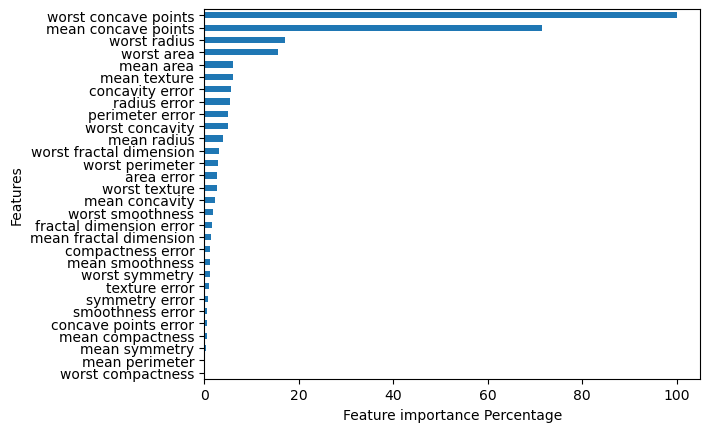

In [33]:
# Visual Python: Machine Learning > Model Info
vp_plot_feature_importances(xgb, X_train, sort=True)

# 5 Ensenble - 수치 예측

In [34]:
# 데이터 로딩
df = pd.read_csv('data/boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [35]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']], df['target'])

In [36]:
# Visual Python: Machine Learning > Regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [37]:
# Visual Python: Machine Learning > Fit/Predict
model.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
# Visual Python: Machine Learning > Fit/Predict
pred = model.predict(X_test)
pred

array([24.711, 10.434, 24.005, 17.153, 20.57 , 17.794, 30.252, 11.373,
       16.642, 26.215, 14.475, 20.674, 29.809, 24.875, 14.911, 22.882,
       13.226, 19.34 , 21.259, 21.115, 32.315, 20.719, 20.692, 33.388,
       34.504, 23.574, 16.003, 31.784, 20.269, 30.005, 10.81 , 35.584,
       19.532, 20.716, 21.6  , 18.341, 10.173, 21.122, 15.249, 20.415,
       22.112, 23.999, 13.805,  8.769, 18.467, 25.188, 19.298, 19.347,
       22.24 , 20.895, 21.54 , 19.492, 20.52 , 19.267, 24.994, 16.806,
       12.24 , 10.846, 24.245, 20.322, 19.794, 25.573, 22.758, 21.671,
       24.643,  9.491, 20.341, 23.074, 24.017, 23.28 , 20.393, 22.249,
       14.649, 23.554, 32.175, 15.217, 24.819, 35.473, 19.972, 24.496,
       31.126, 19.491, 21.761, 46.367, 24.613, 27.324, 18.892, 20.571,
       20.023, 21.19 , 19.325, 20.259, 15.783, 20.272, 21.529, 40.404,
       19.322, 23.085, 20.396, 21.624, 15.614, 19.753, 31.28 , 26.175,
       13.791, 11.45 , 16.941, 20.946, 19.172, 32.247, 11.415, 27.902,
      

In [39]:
# Visual Python: Machine Learning > Evaluation
from IPython.display import display, Markdown

In [40]:
# Visual Python: Machine Learning > Evaluation
# R squared
print('R squared: {}'.format(metrics.r2_score(y_test, pred)))

R squared: 0.8558095058092579


In [41]:
# Visual Python: Machine Learning > Evaluation
# MAE(Mean Absolute Error)
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, pred)))

MAE: 2.147401574803149


In [42]:
# Visual Python: Machine Learning > Evaluation
# RMSE(Root Mean Squared Error)
print('RMSE: {}'.format(metrics.mean_squared_error(y_test, pred)**0.5))

RMSE: 2.9003804909228683


### Regression plot

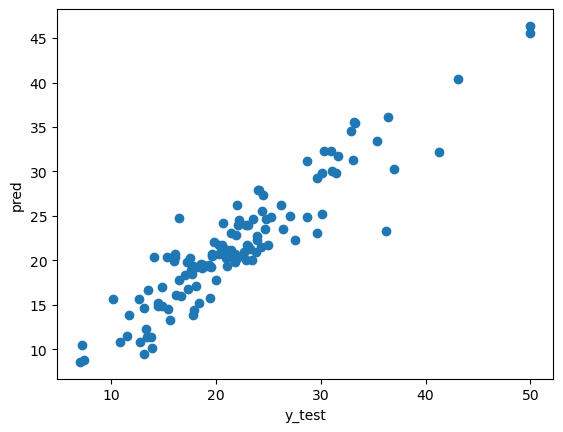

In [43]:
# Visual Python: Machine Learning > Evaluation
# Regression plot
display(Markdown('### Regression plot'))
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.show()

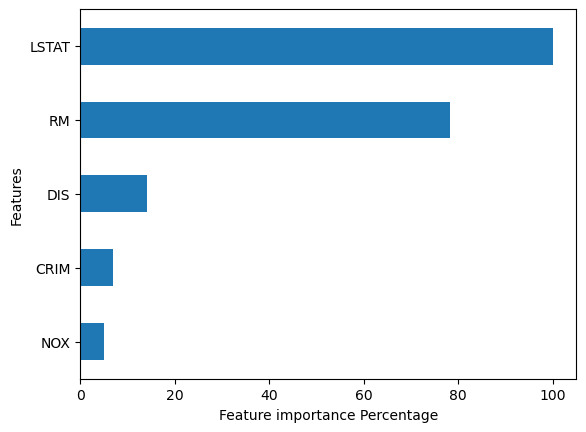

In [44]:
# Visual Python: Machine Learning > Model Info
vp_plot_feature_importances(model, X_train, sort=True, top_count=5)

---

In [45]:
# End of file